In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import least_squares
from scipy.optimize import minimize
from multiprocessing import Pool
from functools import partial
params = {'font.size':14,'font.family':'lmodern','xtick.labelsize':16, 'ytick.labelsize':16,}
plt.rcParams.update(params)

In [2]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

[20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5
 27.  27.5 28.  28.5 29.  29.5 30. ]
{'Current': array([-4.849759e-09, -6.546792e-09, -6.464368e-09, -6.651369e-09,
       -6.399353e-09, -6.596057e-09, -6.697547e-09, -5.954993e-09,
       -7.262780e-09, -7.899750e-09, -4.328059e-07, -1.005348e-05,
       -2.964182e-05, -5.689635e-05, -9.043989e-05, -1.299716e-04,
       -1.752731e-04, -2.271452e-04, -2.864971e-04, -3.551600e-04,
       -4.360362e-04])}
[20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5
 27.  27.5 28.  28.5 29.  29.5 30. ]
{'Current': array([-4.849759e-09, -6.546792e-09, -6.464368e-09, -6.651369e-09,
       -6.399353e-09, -6.596057e-09, -6.697547e-09, -5.954993e-09,
       -7.262780e-09, -7.899750e-09, -4.328059e-07, -1.005348e-05,
       -2.964182e-05, -5.689635e-05, -9.043989e-05, -1.299716e-04,
       -1.752731e-04, -2.271452e-04, -2.864971e-04, -3.551600e-04,
       -4.360362e-04]), 'Voltage': array([-20. , -20.5, -21. , -21

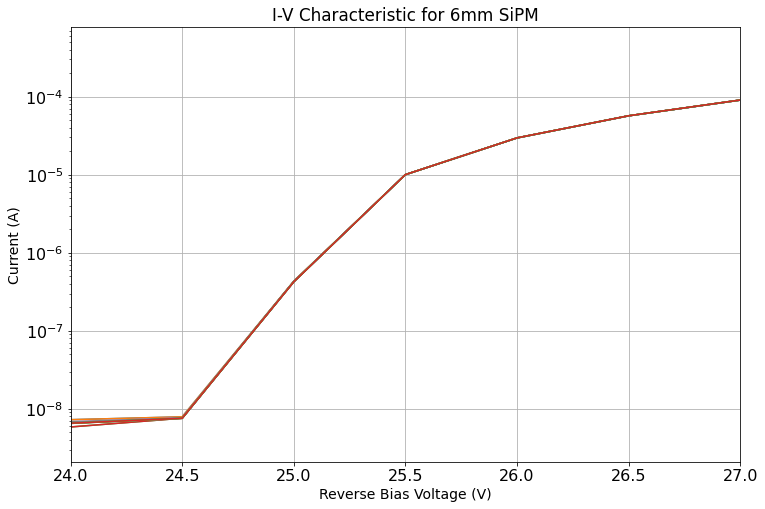

In [20]:
import h5py
import datetime
fig = plt.figure(figsize=(12,8))
# file = h5py.File('/home/ab2935/20210924.h5','r')
file = h5py.File('C:/Data/SiPM/FBK-HD3/20220314/Glenn_SiPM_test.h5','r')

# One itt loop to get number of data points - assumes all data sets have same number
for group in file.keys():
    size = file[group]['Voltage'].size
    break

x_data=np.linspace(20,30,size)

for group in file.keys() :
    data = {}    
  
#     if (int(group) == 53060 or int(group) == 53524 or int(group) ==53606):   
    for datasets in file[group].keys():
        ds_data = file[group][datasets] # returns HDF5 dataset object
#         print (len(ds_data))
        arr = file[group][datasets][:]
        data[datasets] = arr 
        print(x_data)
        print(data)
        plt.plot(x_data, (-1)*data['Current'])  
plt.title("I-V Characteristic for 6mm SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Current (A)')
plt.yscale('log')
plt.xlim(24,27)
#plt.ylim(10e-10,10e-6)
# plt.legend(loc="upper left", ncol = 4)
plt.grid()
plt.show()
fig.savefig('IV_Characteristic_muon_tagger.pdf', dpi=500)

In [ ]:
fig = plt.figure(figsize=(10,6))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
#         print (datasets)
        ds_data = file[group][datasets] # returns HDF5 dataset object

        arr = file[group][datasets][:]
        data[datasets] = arr 


    plt.plot(data['Voltage'], data['Current'],lw=3)   
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.xlim(20,35)
plt.grid()
plt.show()
# fig.savefig('IV_Characteristic.pdf', dpi=500)

In [ ]:
fig = plt.figure(figsize=(12,8))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
        ds_data = file[group][datasets] # returns HDF5 dataset object
        arr = file[group][datasets][:]
        data[datasets] = arr 
    if ((data['Current']>0).all()):
        plt.plot(data['Voltage'], data['Current'],lw=3,label=group)
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.yscale('log')
plt.legend(loc="upper left", ncol = 4)
plt.xlim(20,35)
plt.ylim(0.5e-12,10e-6)
plt.grid()
plt.show()
# fig.savefig('IV_Characteristic_all.pdf', dpi=500)

In [ ]:
fig = plt.figure(figsize=(12,8))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
        ds_data = file[group][datasets] # returns HDF5 dataset object
        arr = file[group][datasets][:]
        data[datasets] = arr 
    if ((data['Current']>0).all()):
        plt.plot(data['Voltage'], data['Current'],lw=3,label=str(datetime.timedelta(seconds=int(group))))
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.yscale('log')
plt.legend(loc="upper left", ncol = 4)
plt.xlim(20,35)
plt.ylim(0.5e-12,10e-6)
plt.grid()
plt.show()
fig.savefig('IV_Characteristic_all.pdf', dpi=500)

In [ ]:
fig = plt.figure(figsize=(12,8))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
        ds_data = file[group][datasets] # returns HDF5 dataset object
        arr = file[group][datasets][:]
        data[datasets] = arr 
    if ((data['Current']>0).all()):
        plt.plot(data['Voltage'], data['Current'],lw=3,label=str(datetime.timedelta(seconds=int(group))))
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.yscale('log')
plt.legend(loc="upper left", ncol = 4)
plt.xlim(20,35)
plt.ylim(0.5e-12,10e-6)
plt.plot([20,35],[2.5e-9,2.5e-9], 'r-', lw=30,alpha=0.2)
plt.grid()
plt.show()
fig.savefig('IV_Characteristic_above1nA.pdf', dpi=500)

In [ ]:
fig = plt.figure(figsize=(12,8))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
        ds_data = file[group][datasets] # returns HDF5 dataset object
        arr = file[group][datasets][:]
        data[datasets] = arr 
    if ((data['Current']>0).all()):
        plt.plot(data['Voltage'], data['Current'],lw=3,label=str(datetime.timedelta(seconds=int(group))))
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.yscale('log')
plt.legend(loc="upper left", ncol = 4)
plt.xlim(20,35)
plt.ylim(0.5e-12,10e-6)
plt.plot([20,35],[1e-10,1e-10], 'r-', lw=130,alpha=0.2)
plt.grid()
plt.show()
fig.savefig('IV_Characteristic_below1nA.pdf', dpi=500)

In [ ]:
fig = plt.figure(figsize=(12,8))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
        ds_data = file[group][datasets] # returns HDF5 dataset object
        arr = file[group][datasets][:]
        data[datasets] = arr 
    if ((data['Current']>1e-9).all()):
        plt.plot(data['Voltage'], data['Current'],lw=3,label=str(datetime.timedelta(seconds=int(group))))
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.yscale('log')
plt.xlim(20,35)
plt.ylim(0.5e-12,10e-6)
plt.plot([31.3, 31.3], [10E-15,10E-5], 'r-', lw=40,alpha=0.2)
plt.legend(loc="upper left", ncol = 4)
plt.grid()
plt.show()
fig.savefig('IV_Characteristic_breakdown_above1nA.pdf', dpi=500)

In [ ]:
#between 37986 and 48545
fig = plt.figure(figsize=(12,8))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
        ds_data = file[group][datasets] # returns HDF5 dataset object
        arr = file[group][datasets][:]
        data[datasets] = arr 
    if (int(group)>37986 and int(group)<48545 and (data['Current']>0).all()):
        plt.plot(data['Voltage'], data['Current'],lw=3,label=str(datetime.timedelta(seconds=int(group))))
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.yscale('log')
plt.legend(loc="upper left", ncol = 4)
plt.xlim(20,35)
plt.ylim(0.5e-12,10e-6)
plt.plot([29.75, 29.75], [10E-15,10E-5], 'r-', lw=70,alpha=0.2)
plt.grid()
plt.show()
fig.savefig('IV_Characteristic_breakdown_middle.pdf', dpi=500)

In [ ]:
#above 53846
fig = plt.figure(figsize=(12,8))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
        ds_data = file[group][datasets] # returns HDF5 dataset object
        arr = file[group][datasets][:]
        data[datasets] = arr 
    if (int(group)>53846 and (data['Current']>0).all()):
        plt.plot(data['Voltage'], data['Current'],lw=3,label=str(datetime.timedelta(seconds=int(group))))
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.yscale('log')
plt.legend(loc="upper left", ncol = 4)
plt.xlim(20,35)
plt.ylim(0.5e-12,10e-6)
plt.plot([28, 28], [10E-15,10E-5], 'r-', lw=50,alpha=0.2)
plt.grid()
plt.show()
fig.savefig('IV_Characteristic_breakdown_end.pdf', dpi=500)

In [ ]:
#above three sections
fig = plt.figure(figsize=(12,8))
for group in file.keys() :
    data = {}
    for datasets in file[group].keys():
        data[datasets] = []
        ds_data = file[group][datasets] # returns HDF5 dataset object
        arr = file[group][datasets][:]
        data[datasets] = arr 
    if ((data['Current']>1e-9).all() or (int(group)>53846 and (data['Current']>0).all()) or (int(group)>37986 and int(group)<48545 and (data['Current']>0).all())):
        plt.plot(data['Voltage'], data['Current'],lw=3,label=str(datetime.timedelta(seconds=int(group))))
plt.title("I-V Characteristic for FBK SiPM")
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Dark Current (A)')
plt.yscale('log')
plt.legend(loc="upper left", ncol = 4)
plt.xlim(20,35)
plt.ylim(0.5e-12,10e-6)
plt.plot([31.3, 31.3], [10E-15,10E-5], 'r-', lw=40,alpha=0.2)
plt.plot([29.75, 29.75], [10E-15,10E-5], 'g-', lw=70,alpha=0.2)
plt.plot([28, 28], [10E-15,10E-5], 'b-', lw=60,alpha=0.2)

plt.grid()
plt.show()
fig.savefig('IV_Characteristic_breakdown_three_sections.pdf', dpi=500)

In [ ]:
pwd